In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
import matplotlib.pyplot as plt

In [4]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls
#PoolQC 부터 Fireplace QU 까지 missing value 원인과 어떻게 처리할지 생각해보기 

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


In [5]:
print("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [6]:
categoricals = train.select_dtypes(exclude = [np.number])
categoricals.describe()
#count 몇번 나오는지 unique는 카테고리가 몇개로 구분되어있는지? top은 가장 빈도가 높은 값
#freq는 top이 얼마나 자주 나오는지 count

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


- 이런 features는 one-hot encoding을 사용해서 숫자로 transform 시켜줘야한다

In [7]:
print("Original: \n")
print(train.Street.value_counts(), "\n")
#enc_street이라는 새로운 컬럼 형성, get dummies method사용
# 주의! train test 둘다에서 반드시 사용해야한다. 

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In [10]:
print("Original: \n")
print(train.Alley.value_counts(), "\n")
#encoding 0, 1? 

Original: 

Grvl    50
Pave    41
Name: Alley, dtype: int64 



In [11]:
print("Original: \n")
print(train.BldgType.value_counts(), "\n")
# encoding 0,1,2 

Original: 

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64 



In [ ]:
def category_xticks():
    i_pivot = train.pivot_table(index='i', values = 'SalePrice', aggfunc=np.mean)
    i_pivot.plot(kind= 'bar', color = 'blue')
    

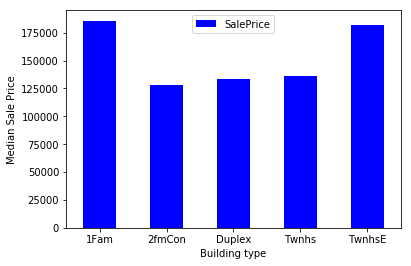

In [2]:
bldtype_pivot = train.pivot_table(index='BldgType', values= 'SalePrice', aggfunc=np.mean)
bldtype_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('Building type')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [12]:
print("Original: \n")
print(train.BsmtCond.value_counts(), "\n")

Original: 

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 



In [13]:
print("Original: \n")
print(train.BsmtExposure.value_counts(), "\n")

Original: 

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 



In [14]:
print("Original: \n")
print(train.MSZoning.value_counts(), "\n")

Original: 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 



In [15]:
print("Original: \n")
print(train.LotShape.value_counts(), "\n")

Original: 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 



In [16]:
print("Original: \n")
print(train.LandContour.value_counts(), "\n")

Original: 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 



In [17]:
print("Original: \n")
print(train.Utilities.value_counts(), "\n")

Original: 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 



In [19]:
print("Original: \n")
print(train.LotConfig.value_counts(), "\n")

Original: 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 



In [20]:
print("Original: \n")
print(train.LandSlope.value_counts(), "\n")

Original: 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 



In [21]:
print("Original: \n")
print(train.Neighborhood.value_counts(), "\n")

Original: 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 



In [22]:
print("Original: \n")
print(train.Condition1.value_counts(), "\n")

Original: 

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64 



In [23]:
print("Original: \n")
print(train.Condition2.value_counts(), "\n")

Original: 

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64 



In [24]:
print("Original: \n")
print(train.BldgType.value_counts(), "\n")

Original: 

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64 



In [25]:
print("Original: \n")
print(train.HouseStyle.value_counts(), "\n")

Original: 

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64 



In [26]:
print("Original: \n")
print(train.RoofStyle.value_counts(), "\n")

Original: 

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64 



In [28]:
print("Original: \n")
print(train.RoofMatl.value_counts(), "\n")

Original: 

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Membran       1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64 



In [29]:
print("Original: \n")
print(train.Exterior1st.value_counts(), "\n")

Original: 

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64 



In [30]:
print("Original: \n")
print(train.Exterior2nd.value_counts(), "\n")

Original: 

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64 



In [32]:
print("Original: \n")
print(train.MasVnrType.value_counts(), "\n")

Original: 

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 



In [33]:
print("Original: \n")
print(train.ExterQual.value_counts(), "\n")

Original: 

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64 



In [34]:
print("Original: \n")
print(train.ExterCond.value_counts(), "\n")

Original: 

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64 



In [35]:
print("Original: \n")
print(train.Foundation.value_counts(), "\n")

Original: 

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64 



In [36]:
print("Original: \n")
print(train.BsmtQual.value_counts(), "\n")

Original: 

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 



In [37]:
print("Original: \n")
print(train.BsmtCond.value_counts(), "\n")

Original: 

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 



In [38]:
print("Original: \n")
print(train.BsmtExposure.value_counts(), "\n")

Original: 

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 



In [39]:
print("Original: \n")
print(train.BsmtFinType1.value_counts(), "\n")

Original: 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 



In [40]:
print("Original: \n")
print(train.Heating.value_counts(), "\n")

Original: 

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64 



In [41]:
print("Original: \n")
print(train.HeatingQC.value_counts(), "\n")

Original: 

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64 



In [42]:
print("Original: \n")
print(train.CentralAir.value_counts(), "\n")

Original: 

Y    1365
N      95
Name: CentralAir, dtype: int64 



In [44]:
print("Original: \n")
print(train.Electrical.value_counts(), "\n")

Original: 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64 



In [46]:
print("Original: \n")
print(train.KitchenQual.value_counts(), "\n")

Original: 

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64 



In [47]:
print("Original: \n")
print(train.Functional.value_counts(), "\n")

Original: 

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64 



In [48]:
print("Original: \n")
print(train.FireplaceQu.value_counts(), "\n")

Original: 

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64 



In [49]:
print("Original: \n")
print(train.GarageType.value_counts(), "\n")

Original: 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 



In [50]:
print("Original: \n")
print(train.GarageFinish.value_counts(), "\n")

Original: 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 



In [51]:
print("Original: \n")
print(train.GarageQual.value_counts(), "\n")

Original: 

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64 



In [52]:
print("Original: \n")
print(train.GarageCond.value_counts(), "\n")

Original: 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 



In [53]:
print("Original: \n")
print(train.PavedDrive.value_counts(), "\n")

Original: 

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64 



In [54]:
print("Original: \n")
print(train.PoolQC.value_counts(), "\n")

Original: 

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64 



In [55]:
print("Original: \n")
print(train.Fence.value_counts(), "\n")

Original: 

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64 



In [57]:
print("Original: \n")
print(train.MiscFeature.value_counts(), "\n")

Original: 

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64 



In [58]:
print("Original: \n")
print(train.SaleType.value_counts(), "\n")

Original: 

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64 



In [59]:
print("Original: \n")
print(train.SaleCondition.value_counts(), "\n")

Original: 

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64 



- get dummies / encoding

In [8]:
train['enc_street']= pd.get_dummies(train.Street, drop_first=True)
test['enc_street']= pd.get_dummies(train.Street, drop_first=True)

In [9]:
print('Encoded:\n')
print(train.enc_street.value_counts())

Encoded:

1    1454
0       6
Name: enc_street, dtype: int64


- feature engineering is the process of making features of the data suitable for use in maching learning and modelling. 
- encoded street features into a column of Boolean values=> engineered a feature  